<a href="https://colab.research.google.com/github/infinity-99/My-projects/blob/master/Copy_of_APPLE_Stock_price_prediction_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) 
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.

In [ ]:
# Import the libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
# Get the stock quote

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-07-25')

# show the data

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2020-07-20,394.000000,384.250000,385.670013,393.429993,22579500.0,392.721924
2020-07-21,397.000000,386.970001,396.690002,388.000000,25911500.0,387.301697
2020-07-22,391.899994,386.410004,386.769989,389.089996,22250400.0,388.389740


In [ ]:
# Get thenumber of rows and columns in the data set

df.shape

(2154, 6)

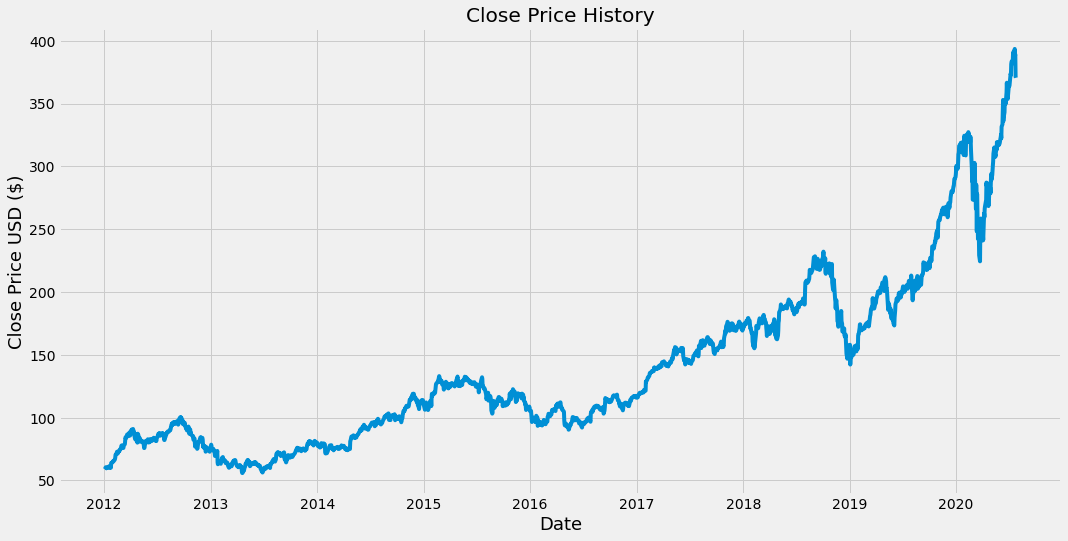

In [ ]:
# Visualize the closing price history

plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column'

data = df.filter(['Close'])

# Convert the dataframe to a numpy array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1724

In [ ]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00875827],
       [0.00969334],
       [0.01163538],
       ...,
       [0.98714608],
       [0.93469379],
       [0.93196896]])

In [ ]:
# Create the training dataset
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00875827, 0.00969334, 0.01163538, 0.01348435, 0.01320087,
       0.01383976, 0.01354781, 0.01305701, 0.01238851, 0.01445749,
       0.01632339, 0.01574796, 0.01259583, 0.01560411, 0.01264237,
       0.02374887, 0.02288997, 0.02401121, 0.02643559, 0.02790376,
       0.02778106, 0.02732835, 0.0292577 , 0.03107281, 0.03312912,
       0.03645049, 0.04342749, 0.04353326, 0.04741738, 0.05031986,
       0.04533145, 0.04725235, 0.04721428, 0.05260041, 0.05183458,
       0.05325197, 0.05579907, 0.05721648, 0.06129944, 0.06427388,
       0.06513276, 0.06543318, 0.06034746, 0.05912044, 0.05930239,
       0.06408346, 0.06542895, 0.06831874, 0.07513074, 0.08421904,
       0.08251815, 0.08252237, 0.0890932 , 0.09114948, 0.08968554,
       0.08834854, 0.08695653, 0.09158105, 0.09475435, 0.0960829 ])]
[0.09279959717229741]

[array([0.00875827, 0.00969334, 0.01163538, 0.01348435, 0.01320087,
       0.01383976, 0.01354781, 0.01305701, 0.01238851, 0.01445749,
       0.01632339, 0.01574796, 0.01

In [ ]:
# Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1664, 60, 1)

In [ ]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1664/1664 [==============================] - 35s 21ms/step - loss: 4.1122e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1664 to 2004

test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array

x_test = np.array(x_test)

In [ ]:
#Reshape the data

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

14.361977971986283

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


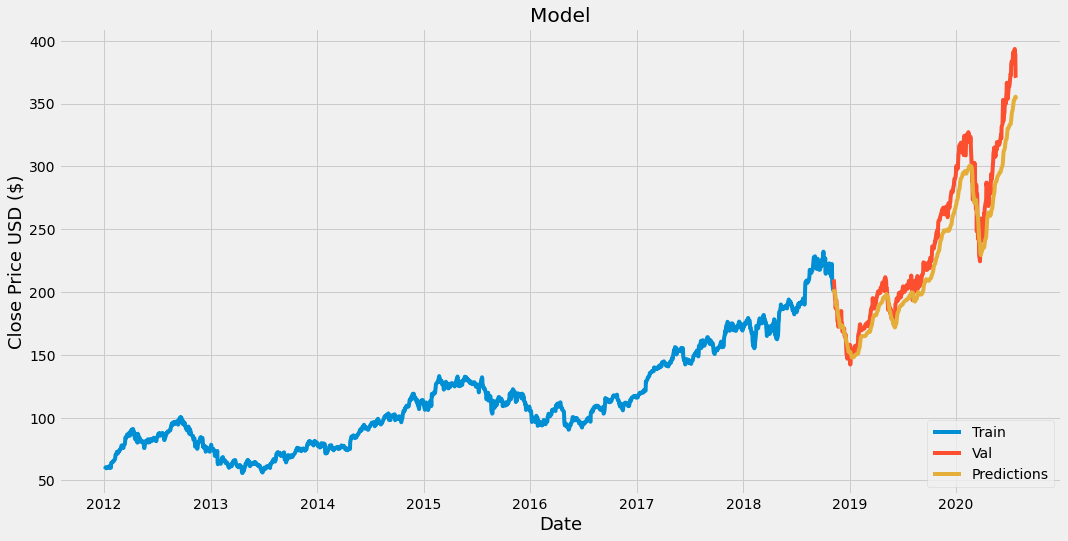

In [ ]:
# Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices

valid

,Close,Predictions
Date,,
2018-11-07,209.949997,202.189270
2018-11-08,208.490005,200.935654
2018-11-09,204.470001,200.112640
2018-11-12,194.169998,199.182907
2018-11-13,192.229996,197.180649
...,...,...
2020-07-20,393.429993,353.244446
2020-07-21,388.000000,354.458618
2020-07-22,389.089996,355.053345


In [ ]:
# Get the quote

apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2020-07-25')

# Create a new dataframe

new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array

last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list

X_test = []

# Append the past 60 days

X_test.append(last_60_days_scaled)

# Convert the X_test data set to numpy array

X_test = np.array(X_test)

# Reshape the data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price

pred_price = model.predict(X_test)

# undo the scaling

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[350.86905]]


In [ ]:
# Get the quote

apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start='2020-07-29', end='2020-07-29')
print(apple_quote2['Close'])

Date
2020-07-29    380.160004
Name: Close, dtype: float64
